In [1]:
import rasterio
import numpy as np
from affine import Affine
from pyproj import Proj, transform
import pyproj
# import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import h5py
# import pyhdf
# from pyhdf.SD import SD, SDC
# import re
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from PIL import Image
import scipy.stats as stats
import numpy.ma as ma

In [2]:
qa_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180131_20200902_02_T1_QA_PIXEL.TIF')



In [201]:
# Define red, nir, and swir bands
red_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180131_20200902_02_T1_SR_B4.TIF')
nir_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180131_20200902_02_T1_SR_B5.TIF')
swir_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180131_20200902_02_T1_SR_B7.TIF')

In [202]:
# convert to pandas dataframe
red = pd.DataFrame(np.array(red_im))
nir = pd.DataFrame(np.array(nir_im))
swir = pd.DataFrame(np.array(swir_im))

In [203]:
# convert fill value to nans
red=red.replace(0,np.nan)
nir=nir.replace(0,np.nan)
swir=swir.replace(0,np.nan)

In [204]:
# filter through only valid values and replace non-valid values with nans 
mask_red = (red > 7273) & (red < 43636) 
mask_nir = (nir > 7273) & (nir < 43636)
mask_swir = (swir > 7273) & (swir < 43636)

red = red[mask_red]
nir = nir[mask_nir]
swir = swir[mask_swir]

In [205]:
# Multiply by scale factor and add offset
red = (0.0000275*red) - 0.2
nir = (0.0000275*nir) - 0.2
swir = (0.0000275*swir) - 0.2

In [206]:
# DELETE IF NEEDED

red = np.asarray(red)
nir = np.asarray(nir)
swir = np.asarray(swir)

In [207]:
# DELETE IF NEEDED

# slice the dataframes to obtain only region of interest

# rows

# red_arr = np.delete(red,slice(4000,9999999),0)
# nir_arr = np.delete(nir,slice(4000,9999999),0)
# swir_arr = np.delete(swir,slice(4000,9999999),0)

# # columns

# red = np.delete(red_arr,slice(4000,9999999),1)
# nir = np.delete(nir_arr,slice(4000,9999999),1)
# swir = np.delete(swir_arr,slice(4000,9999999),1)


In [208]:
red = red[1200:2200,2700:3700]
nir = nir[1200:2200,2700:3700]
swir = swir[1200:2200,2700:3700]

In [209]:
# check if shape is same for all
print(red.shape)
print(nir.shape)
print(swir.shape)

(1000, 1000)
(1000, 1000)
(1000, 1000)


In [210]:
# Calculate NDVI and assign to variable
ndvi=(nir-red)/(nir+red)

In [211]:
# Delete
ndvi_arr = np.asarray(ndvi) 


In [212]:
# filter ndvi values
ndvi_arr[ndvi_arr < 0] = np.nan
ndvi_arr[ndvi_arr > 1] = np.nan 

In [213]:
ndvi = pd.DataFrame(ndvi_arr)

In [214]:
# convert swir back to array
swir_arr = np.asarray(swir)

In [215]:
# filter swir values
swir_arr[swir_arr < 0.01] = np.nan
swir_arr[swir_arr > 100] = np.nan

In [216]:
swir = pd.DataFrame(swir_arr)

In [217]:
# Calculate STR and assign to variable
str0=((1-swir)**2)/(2*swir)

In [218]:
# THIS IS WHAT TO DO FOR FILTERING SWIR
SWIR=pd.DataFrame(np.asarray(swir).flatten())

In [219]:
SWIR=SWIR.rename(columns={0:'SWIR'})

In [220]:
# END WHAT TO DO FOR FILTERING FOR SWIR

In [221]:
# START WHAT TO DO FOR FILTERING FOR NDVI

In [222]:
NDVI=pd.DataFrame(np.asarray(ndvi).flatten())

In [223]:
NDVI=NDVI.rename(columns={0:'NDVI'})

In [224]:
# (DELETE IF NEEDED)
NDVI['STR'] = ((1-SWIR['SWIR'])**2)/(2*SWIR['SWIR']) 

In [225]:
# MAIN DATAFRAME (DELETE IF NEEDED)
DF = NDVI
DF

,NDVI,STR
0,0.822267,8.948290
1,0.793952,7.681657
2,0.783891,7.520569
3,0.790470,7.380668
4,0.793353,7.384492
...,...,...
999995,0.897133,NaN
999996,0.908506,NaN
999997,0.868219,NaN
999998,0.852428,44.887532


In [226]:
x_wet=np.linspace(0,1,100)
x_dry=np.linspace(0,1,100)

In [227]:
# convert to array and flatten ndvi and str
ndvi_flat=np.asarray(ndvi).flatten()
str0_flat=np.asarray(str0).flatten()

In [228]:
# convert both to list
ndvi_list = ndvi_flat.tolist()
str0_list = str0_flat.tolist()

In [229]:
# calculate STR max list (change "before" equation below accordingly)
str_max_list=[]
for i in range(len(ndvi_list)):
    if ((30.134*ndvi_list[i])+5.856) > str0_list[i] and ((2.121*ndvi_list[i])-0.296) < str0_list[i]:
            before=(30.134*ndvi_list[i])+5.856
            str_max_list.append(before)
    else:
        str_max_list.append(np.nan) 

In [230]:
# calculate STR min list (change "before" equation below accordingly)
str_min_list=[]
for i in range(len(ndvi_list)):
    if ((30.134*ndvi_list[i])+5.856) > str0_list[i] and ((2.121*ndvi_list[i])-0.296) < str0_list[i]:
            before=(2.121*ndvi_list[i])-0.296
            str_min_list.append(before)
    else:
        str_min_list.append(np.nan)

In [231]:
str0_max_arr = np.asarray(str_max_list)
str0_min_arr = np.asarray(str_min_list)

In [232]:
str_max = str0_max_arr.reshape((red.shape[0], red.shape[1]))
str_min = str0_min_arr.reshape((red.shape[0], red.shape[1]))

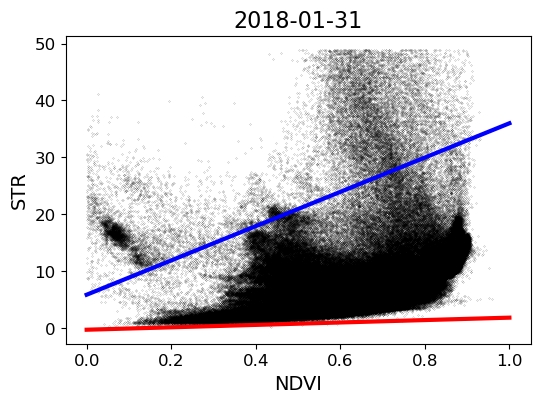

In [233]:
plt.figure(figsize=(6,4))
plt.title('2018-01-31',fontsize=16)
plt.scatter(DF['NDVI'],DF['STR'],color='black',s=0.01)
# plt.ylim(-1,100)
# plt.xlim(0,1)
plt.xlabel('NDVI',fontsize=14)
plt.ylabel('STR',fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
# plt.scatter(DF['NDVI'],str0_max_arr,color='hotpink')
# plt.scatter(DF['NDVI'],str0_min_arr,color='green')
plt.plot(x_wet,(30.134*x_wet+5.856),color='blue',linewidth=3)
plt.plot(x_dry,(2.121*x_dry)-.296,color='red',linewidth=3)

# plt.savefig('/Users/nikaankoupaei/Downloads/STR_NDVI_PANEL4.png',dpi=300,bbox_inches="tight")

In [3]:
qa_arr = np.asarray(qa_im)

In [4]:
qa_arr_sliced = qa_arr[1200:2200,2700:3700]

In [5]:
# DELETE IF NEEDED

# slice the dataframes to obtain only region of interest

# rows

# qa_arr = np.delete(qa,slice(4000,9999999),0)

# columns

# qa_arr = np.delete(qa_arr,slice(4000,9999999),1)


In [6]:
qa_arr_sliced.shape

(1000, 1000)

In [7]:
qa = pd.DataFrame(qa_arr_sliced.flatten())

In [8]:
qa.shape

(1000000, 1)

In [9]:
df_qa=qa.rename(columns={0:'QA'})
df_qa

,QA
0,21824
1,21824
2,21824
3,21824
4,21824
...,...
999995,21824
999996,21824
999997,21824
999998,21824


In [11]:
df_qa.value_counts()

QA   
21824    784581
55052     99973
54596     62273
54852      9113
21952      8667
56854      6619
56660      4267
56598      4236
22080      3481
54534      3417
23888      2860
54790      2621
56916      2290
22280      1992
22018      1328
24082       951
21762       788
23826       316
24144       203
54724        14
62758        10
dtype: int64

In [42]:
OPTRAM = (str0 - str_min)/(str_max - str_min)

In [43]:
df_OPTRAM = pd.DataFrame(np.asarray(OPTRAM).flatten())

In [44]:
df_OPTRAM=df_OPTRAM.rename(columns={0:'OPTRAM'})
df_OPTRAM

,OPTRAM
0,0.310324
1,0.309048
2,0.311950
3,0.310737
4,0.295102
...,...
999995,0.277950
999996,0.271998
999997,0.283210
999998,0.295691


In [45]:
print(df_qa.shape)
print(df_OPTRAM.shape)

(1000000, 1)
(1000000, 1)


In [46]:
df_OPTRAM['QA'] = df_qa['QA']
df_OPTRAM

,OPTRAM,QA
0,0.310324,21824
1,0.309048,21824
2,0.311950,21824
3,0.310737,21824
4,0.295102,21824
...,...,...
999995,0.277950,21824
999996,0.271998,21824
999997,0.283210,21824
999998,0.295691,21824


In [47]:
# Setting all rows that are not clear (i.e. those that have cloudy pixels)

df_clear = df_OPTRAM.where(df_OPTRAM['QA'] == 21824)

In [48]:
df_clear

,OPTRAM,QA
0,0.310324,21824.0
1,0.309048,21824.0
2,0.311950,21824.0
3,0.310737,21824.0
4,0.295102,21824.0
...,...,...
999995,0.277950,21824.0
999996,0.271998,21824.0
999997,0.283210,21824.0
999998,0.295691,21824.0


In [49]:
OPTRAM_clear_array = np.asarray(df_clear['OPTRAM'])
OPTRAM_clear_array.shape

(1000000,)

In [50]:
OPTRAM_FINAL_CLOUD_MASKED = OPTRAM_clear_array.reshape((1000,1000))
OPTRAM_FINAL_CLOUD_MASKED.shape

(1000, 1000)

In [51]:
pd.DataFrame(OPTRAM_FINAL_CLOUD_MASKED).to_csv('/Users/nikaankoupaei/Downloads/ownCloud/CH2_Data/Hirano/UF/OPTRAM_FIRE_2014_2015_CLOUD_50/fire_OPTRAM_20150328_hirano_filtered.csv')


